In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import listdir
from os.path import isdir
from numpy import savez_compressed
from numpy import asarray
from numpy import load
from numpy import expand_dims
from random import choice
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 

In [3]:
df1 = pd.read_excel('Train_Dataset.xlsx',header=None)
df2 = pd.read_excel('Test_Dataset.xlsx',header=None)

In [4]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1


In [5]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 4.3 MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 2.1 MB


In [8]:
df1[560].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [9]:
df2['Target'].unique()

KeyError: 'Target'

In [ ]:
df1.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

## Creating random sample for Subject Target

In [70]:
from random import seed
from random import choice
#seed random number generator
#seed(1) - Helps generate one similiar constant type of output
#prepare a sequence
sequence = [i for i in range(1, 22)]
print(sequence)
for _ in range(3):
    selection = choice(sequence)
    print(selection)
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
15
9
8


# Subject 1

In [10]:
df1.rename(columns = {560:'Target'}, inplace=True)
df2.rename(columns = {560:'Target'}, inplace=True)


In [11]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1


In [12]:
df1['Target'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

## Concantenating Selected Random samples for Subject 1 Train Dataset

In [14]:
df_1 = df1[df1['Target']==1]
df_8 = df1[df1['Target']==8]
df_9 = df1[df1['Target']==9]
df_15 = df1[df1['Target']==15]


new_sub1 = pd.concat([df_1,df_8,df_9,df_15],axis=0)
new_sub1

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578,15
707,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936,15
708,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023,15
709,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493,15


## Concantenating Selected Random samples for Subject 1 Test Dataset

In [141]:
df_1 = df2[df2['Target']==1]
df_8 = df2[df2['Target']==8]
df_9 = df2[df2['Target']==9]
df_15 = df2[df2['Target']==15]

new_sub2 = pd.concat([df_1,df_8,df_9,df_15],axis=0)
new_sub2

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.998431,0.673397,-0.623196,-0.216206,0.200239,0.134522,-0.080630,-0.115864,0.002157,0.075438,...,-0.863218,-0.913692,-0.904833,-0.891333,-0.913037,-0.923616,-0.950624,-0.938924,-0.936727,15
344,-0.996226,0.330556,-0.058281,-0.203485,-0.130112,0.007936,0.077145,0.052111,-0.010701,-0.040239,...,-0.798519,-0.894501,-0.906681,-0.900236,-0.919986,-0.803766,-0.947755,-0.845636,-0.931592,15
345,-0.978200,0.693066,-0.782994,-0.117793,0.197012,-0.012691,-0.157029,-0.056085,0.057886,0.049603,...,-0.780782,-0.878642,-0.868823,-0.880313,-0.688428,-0.899169,-0.926603,-0.834911,-0.938218,15
346,-0.980664,0.706215,-0.733429,-0.004720,0.276041,-0.023342,-0.163338,-0.038095,0.078667,0.021085,...,-0.841463,-0.909328,-0.929542,-0.936646,-0.923303,-0.900346,-0.916950,-0.942473,-0.930519,15


In [81]:
new_sub1['Target'].unique()

array([ 1,  8,  9, 15], dtype=int64)

In [142]:
new_sub2['Target'].unique()

array([ 1,  8,  9, 15], dtype=int64)

In [111]:
new_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 710
Columns: 561 entries, 0 to Target
dtypes: float64(560), int64(1)
memory usage: 825.4 KB


In [143]:
new_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 347
Columns: 561 entries, 0 to Target
dtypes: float64(560), int64(1)
memory usage: 421.5 KB


In [112]:
new_sub1['Target'].value_counts()

15    48
9     48
8     48
1     44
Name: Target, dtype: int64

In [144]:
new_sub2['Target'].value_counts()

15    24
9     24
8     24
1     24
Name: Target, dtype: int64

In [113]:
new_sub1['Target'] = new_sub1['Target'].map({1 : 1, 8: 0, 9: 0, 15: 0})

In [114]:
new_sub1['Target'].unique()

array([1, 0], dtype=int64)

In [145]:
new_sub2['Target'] = new_sub2['Target'].map({1 : 1, 8: 0, 9: 0, 15: 0})
new_sub2['Target'].unique()

array([1, 0], dtype=int64)

In [115]:
#Show records where Target is 1
real = new_sub1[new_sub1['Target'] == 1]
real.head()


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1


In [116]:
#Showing records where the remaining Targets bear 0 as Imposter
imposter = new_sub1[new_sub1['Target'] == 0]
imposter

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
328,-0.970152,0.375055,-0.939387,0.594652,0.527084,-0.007864,-0.269716,-0.090225,0.165680,0.187907,...,-0.739536,-0.885239,-1.347072,-0.856537,-1.275747,-1.047940,-1.006283,-0.692604,-0.999023,0
329,-0.972266,0.365199,-0.967341,0.689590,0.342092,-0.311692,-0.153202,0.264522,0.233932,-0.065577,...,-0.701460,-0.658404,-1.164105,-0.681845,-0.882182,-0.998934,-0.964177,-0.544549,-0.983774,0
330,-0.969340,0.623034,-0.750718,0.663994,-0.169509,-0.447433,0.118007,0.323640,-0.088855,-0.314201,...,-0.855527,-0.821493,-0.935907,-0.810752,-0.564070,-0.796014,-0.706040,-0.905599,-0.927920,0
331,-0.935793,0.381102,-0.969931,0.322044,0.312816,-0.084256,-0.210017,-0.083700,0.065242,0.064283,...,-0.762540,-0.589013,-1.109682,-0.760571,-1.053787,-1.000891,-0.589704,-0.709439,-0.855125,0
332,-0.978864,0.647709,-0.610898,0.039540,0.210079,-0.084734,-0.140190,0.075404,0.149578,-0.042342,...,-0.840914,-0.824087,-0.955391,-0.865448,-0.831928,-0.689670,-0.650367,-0.906958,-0.882427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578,0
707,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936,0
708,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023,0
709,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493,0


In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
dfFeatures = new_sub1.loc[:, new_sub1.columns != 'Target']

In [120]:
dfFeatures

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.894662,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.916980,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.918481,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.905363,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.998786,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.748350,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578
707,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.910214,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936
708,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.919566,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023
709,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.908370,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493


In [146]:
dfFeaturess = new_sub2.loc[:, new_sub2.columns != 'Target']
dfFeaturess

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.916718,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.920799,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.920387,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.592803,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.882103,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.998431,0.673397,-0.623196,-0.216206,0.200239,0.134522,-0.080630,-0.115864,0.002157,0.075438,...,-0.822844,-0.863218,-0.913692,-0.904833,-0.891333,-0.913037,-0.923616,-0.950624,-0.938924,-0.936727
344,-0.996226,0.330556,-0.058281,-0.203485,-0.130112,0.007936,0.077145,0.052111,-0.010701,-0.040239,...,-0.905144,-0.798519,-0.894501,-0.906681,-0.900236,-0.919986,-0.803766,-0.947755,-0.845636,-0.931592
345,-0.978200,0.693066,-0.782994,-0.117793,0.197012,-0.012691,-0.157029,-0.056085,0.057886,0.049603,...,-0.662694,-0.780782,-0.878642,-0.868823,-0.880313,-0.688428,-0.899169,-0.926603,-0.834911,-0.938218
346,-0.980664,0.706215,-0.733429,-0.004720,0.276041,-0.023342,-0.163338,-0.038095,0.078667,0.021085,...,-0.850962,-0.841463,-0.909328,-0.929542,-0.936646,-0.923303,-0.900346,-0.916950,-0.942473,-0.930519


In [121]:
scaler.fit(dfFeatures)

StandardScaler()

In [147]:
scaler.fit(dfFeaturess)

StandardScaler()

In [149]:
scaled_data = scaler.transform(dfFeatures)

In [152]:
scaled_dataa = scaler.transform(dfFeaturess)

In [150]:
scaled_data

array([[-0.80671807, -0.59774049, -1.07910639, ...,  1.74833142,
         0.3904869 ,  0.47598117],
       [-0.73830895, -1.97035842,  1.07527154, ...,  0.24127131,
        -0.22589081, -0.26293226],
       [-0.47995516, -1.14363033,  0.21617414, ...,  0.13373131,
        -0.15659666, -0.64364585],
       ...,
       [ 0.78194267,  0.0314606 , -1.35011535, ...,  1.00363667,
         0.40648577,  2.11523082],
       [ 0.88677805, -0.37286699, -1.03140736, ...,  2.17488004,
         0.72463993,  0.39504676],
       [ 1.05942705,  0.08664749, -1.24246515, ...,  2.43789012,
        -0.134082  ,  0.74897099]])

In [153]:
scaled_dataa

array([[-0.09213216, -0.19501459, -0.85863991, ..., -0.45478083,
        -0.51364583, -0.54122589],
       [ 1.30321741,  0.13486981, -0.76102654, ..., -0.88918778,
        -0.16363902, -0.4868046 ],
       [-0.36266196, -0.18002687, -0.68729918, ..., -0.80197299,
        -0.19961523, -0.62716501],
       ...,
       [-0.09279171, -0.40689233, -0.61861262, ...,  0.10575753,
         1.21880349, -0.14809407],
       [-0.2508263 , -0.24323267, -0.36094643, ...,  0.36283571,
        -0.44038265,  0.0639109 ],
       [-0.9417817 , -1.16785273,  0.73519596, ..., -0.08914954,
        -0.32682613,  0.28588231]])

In [124]:
# PCA
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=30)

In [126]:
pca.fit(scaled_data)

PCA(n_components=30)

In [154]:
pca.fit(scaled_dataa)

PCA(n_components=30)

In [127]:
x_pca = pca.transform(scaled_data)

In [183]:
x_pcaa = pca.transform(scaled_dataa)

In [184]:
scaled_data.shape

(188, 560)

In [185]:
scaled_dataa.shape

(96, 560)

In [186]:
x_pca.shape

(188, 30)

In [187]:
x_pcaa.shape

(96, 30)

In [188]:
X = x_pca
X

array([[-4.30137437, -1.42705592,  3.56032544, ..., -4.0516362 ,
         1.05753744,  0.13975762],
       [-1.78423453,  1.30463472, -1.40075174, ..., -0.97603059,
         1.61557694,  0.39021873],
       [-1.53409442,  2.31689394, -1.18397255, ..., -2.52763941,
         0.41210122, -2.84842933],
       ...,
       [-6.96593007,  0.51557491,  2.31010178, ...,  1.31455193,
        -0.48307612, -0.02123173],
       [-5.90299201, -1.77595248,  1.53785735, ...,  0.73681026,
        -0.54128291,  0.68239942],
       [-8.02405212, -1.30421535,  2.10019156, ..., -0.11593331,
        -1.5687581 ,  0.68931445]])

In [189]:
x = x_pcaa
x

array([[  3.00815741,  -3.22089194,   5.79255624, ...,  -2.63495357,
         -0.71321586,  -3.63808799],
       [ -2.50081458,  -2.69429818,   8.44161943, ...,   1.41637907,
         -0.70830982,  -0.7868837 ],
       [ -3.74969544,   0.45848583,   7.72716827, ...,  -1.34335014,
          0.34013022,   0.90153809],
       ...,
       [ 10.46184436,  -1.98665219,   3.73802094, ...,   9.73971922,
         -0.77915115,   0.83286205],
       [  3.73564483,  -7.43495629,  -2.70939848, ...,   2.29376727,
         -0.700601  ,   0.33196201],
       [ 11.90295249, -10.7931217 ,  -4.40404008, ...,  -3.28534384,
          4.76300208,   6.49387231]])

Text(0, 0.5, 'Second Principal Component')

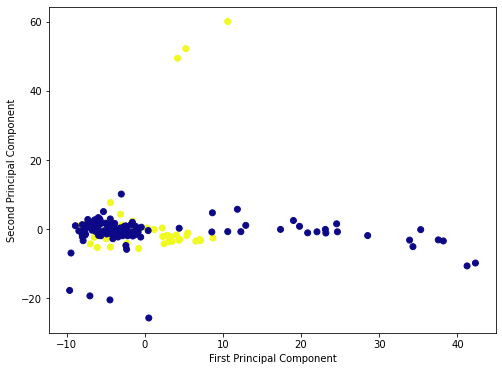

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_sub1['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

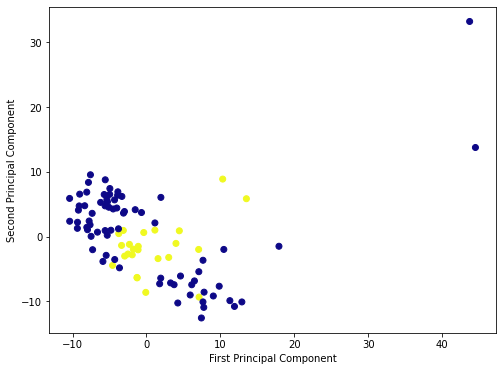

In [190]:
plt.figure(figsize=(8,6))
plt.scatter(x_pcaa[:,0],x_pcaa[:,1],c=new_sub2['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [135]:
pca.components_

array([[ 0.01201504, -0.03555886, -0.00462208, ...,  0.01719578,
         0.00839765,  0.01905205],
       [ 0.04752627, -0.08251779,  0.07433042, ...,  0.10778321,
         0.10220155,  0.10335968],
       [ 0.05703228, -0.065257  , -0.0082865 , ...,  0.05859079,
         0.03084404,  0.02169583],
       ...,
       [-0.00344093,  0.00098424,  0.03086749, ..., -0.00341022,
        -0.00395744, -0.00715935],
       [-0.01969699,  0.00300177, -0.04389154, ..., -0.01843343,
        -0.019491  , -0.00928773],
       [ 0.01820479, -0.00453263, -0.03563372, ...,  0.01457045,
        -0.01062765,  0.01161214]])

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, y_train = X, new_sub1['Target']
print(X_train.shape,y_train.shape)

(188, 30) (188,)


In [205]:
X_test, y_test = x, new_sub2['Target']
print(X_test.shape,y_test.shape)

(96, 30) (96,)


In [208]:
print(f'Dataset: Train={X_train.shape[0]}, Test={X_test.shape[0]}')

Dataset: Train=188, Test=96


In [194]:
X = X
y = new_sub1['Target']
X_train = X
y_train = new_sub1['Target']
X_test = x
y_test = new_sub2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [195]:
from sklearn.svm import SVC

In [196]:
model = SVC()

In [197]:
model.fit(X_train,y_train)

SVC()

In [198]:
predictions = model.predict(X_test)

In [199]:
from sklearn.metrics import classification_report,confusion_matrix

In [200]:
from sklearn.metrics import accuracy_score

In [201]:
score_test = accuracy_score(y_test,predictions)
score_test

0.8936170212765957

In [202]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[36  0]
 [ 5  6]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        36
           1       1.00      0.55      0.71        11

    accuracy                           0.89        47
   macro avg       0.94      0.77      0.82        47
weighted avg       0.91      0.89      0.88        47

